In [1]:
import numpy as np
import astropy.units as u
import time
from datetime import datetime
today = int(datetime.today().strftime('%Y%m%d'))
import poppy
import skimage
from skimage.registration import phase_cross_correlation
import copy
from importlib import reload
import matplotlib.pyplot as plt


import magpyx
from magpyx.utils import ImageStream
import purepyindi
from purepyindi import INDIClient
client0 = purepyindi.INDIClient('localhost', 7624)
client0.start()

from math_module import xp, xcipy, np_array
import utils
import fsm_utils
import cam_utils
from imshows import imshow1, imshow2, imshow3
from matplotlib.patches import Circle

wavelength = 633e-9
fl = 500e-3
fsm_pupil_diam = 6.8e-3
as_per_lamD = (wavelength/fsm_pupil_diam*u.radian).to(u.arcsec)
print(as_per_lamD)

pxscl_lamD = 3.45e-6 / (fl * wavelength/fsm_pupil_diam)
print(1/pxscl_lamD)



19.200826816825295 arcsec
13.491048593350387


/opt/conda/envs/km310gpu/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


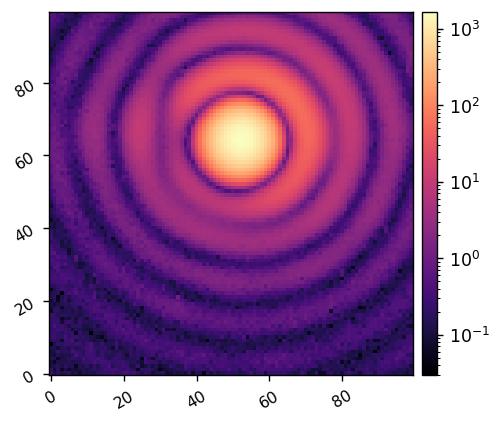

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
NAXIS3  =                 6227                                                  
EXPTIME = 9.99999974737875E-05                                                  
FPS     =     1245.32995605469                                                  

In [20]:
date = 20241016
short_data, short_hdr = utils.load_fits(f'data/drift/{date}_short_drift_data_fsm_off.fits', header=True)
short_data = np_array(short_data)

Nshort = short_hdr['NAXIS3']
fps = short_hdr['FPS']
mean_frame = np.mean(short_data, axis=0)
imshow1(mean_frame, lognorm=True)
short_hdr

In [24]:
shift_pix = []
for i in range(Nshort):
    shift, _, _ = phase_cross_correlation(short_data[i], mean_frame, upsample_factor=100)
    shift_pix.append(shift)
shift_pix = np.array(shift_pix)

In [ ]:
shift_pix[:,0] = shift_pix[:,0] - np.mean(shift_pix[:,0])
shift_pix[:,1] = shift_pix[:,1] - np.mean(shift_pix[:,1])

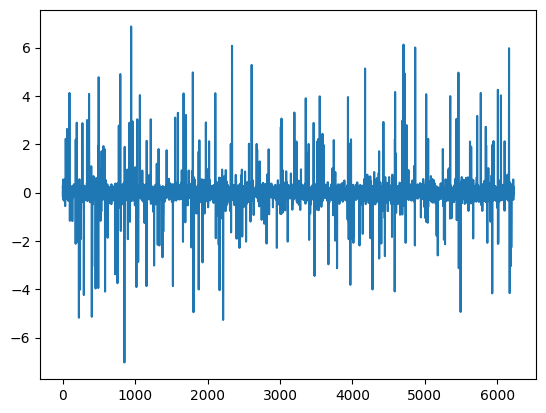

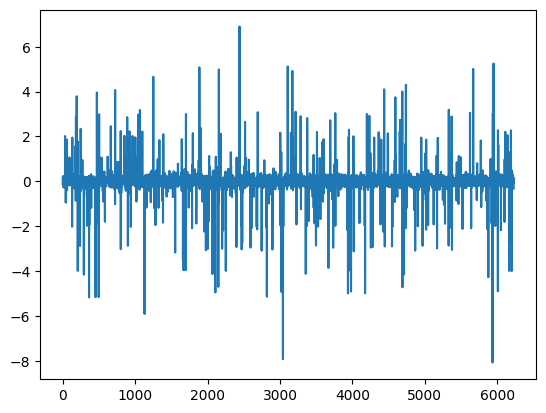

In [28]:
plt.plot(shift_pix[:,0])
plt.show()
plt.plot(shift_pix[:,1])
plt.show()

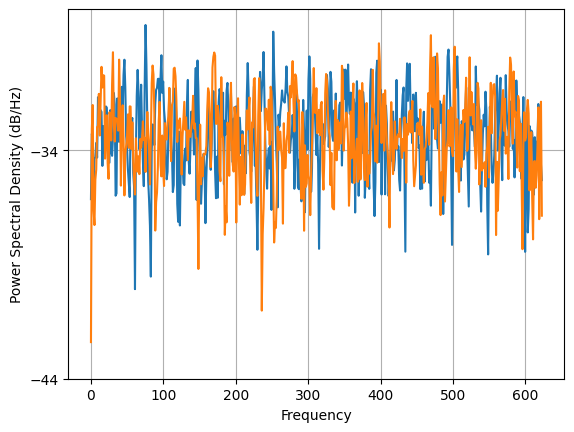

In [30]:
py, freq = plt.psd(shift_pix[:,0], Fs=fps, NFFT=1024)
px, freq = plt.psd(shift_pix[:,1], Fs=fps, NFFT=1024)

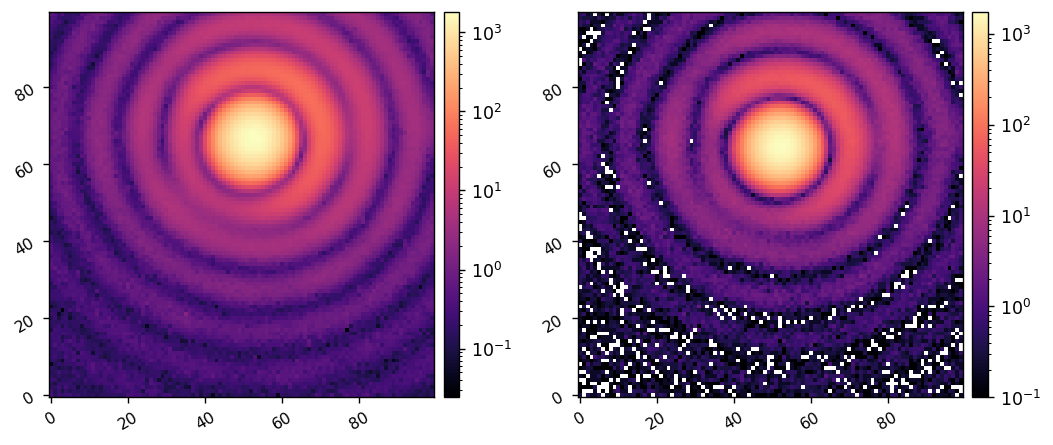

In [64]:
date = 20241016
long_data, long_hdr = utils.load_fits(f'data/drift/{date}_long_drift_data_fsm_off.fits', header=True)
long_data = np_array(long_data)

Nlong = long_hdr['NAXIS3']
fps = long_hdr['FREQ']
mean_frame = np.mean(long_data, axis=0)
imshow2(mean_frame, long_data[0], lognorm1=True, lognorm2=True)

In [51]:
shift_pix = []
for i in range(Nlong):
    shift, _, _ = phase_cross_correlation(long_data[i], mean_frame, upsample_factor=100)
    shift_pix.append(shift)
shift_pix = np.array(shift_pix)

In [52]:
shift_pix[:,0] = shift_pix[:,0] - np.mean(shift_pix[:,0])
shift_pix[:,1] = shift_pix[:,1] - np.mean(shift_pix[:,1])

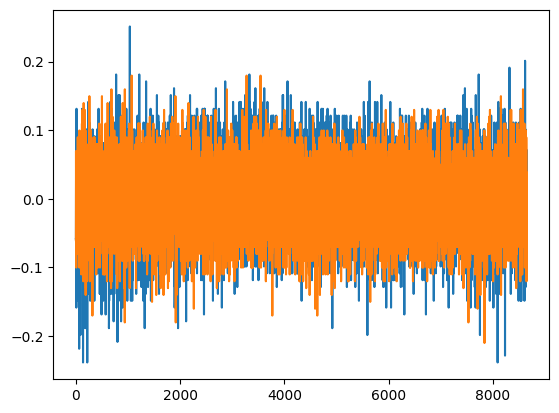

In [53]:
plt.plot(shift_pix[:,0])
plt.plot(shift_pix[:,1])
plt.show()

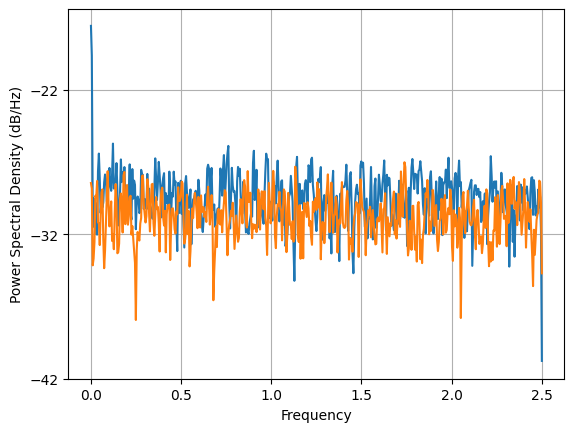

In [67]:
py, freq = plt.psd(shift_pix[:,0], Fs=fps, NFFT=1024)
px, freq = plt.psd(shift_pix[:,1], Fs=fps, NFFT=1024)

# Now analyze the data with the FSM on

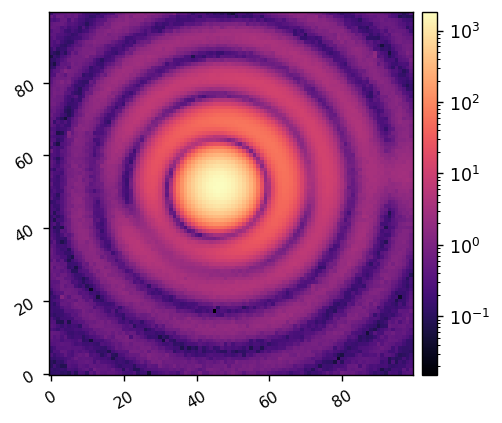

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
NAXIS3  =                 6227                                                  
EXPTIME = 9.99999974737875E-05                                                  
FPS     =     1245.32995605469                                                  
T_TOTAL =                  5.0                                                  

In [2]:
date = 20241021
short_data, short_hdr = utils.load_fits(f'data/drift/{date}_short_drift_data_fsm_on.fits', header=True)
short_data = np_array(short_data)

Nshort = short_hdr['NAXIS3']
fps = short_hdr['FPS']
mean_frame = np.mean(short_data, axis=0)
imshow1(mean_frame, lognorm=True)
short_hdr

In [3]:
shift_pix = []
for i in range(Nshort):
    shift, _, _ = phase_cross_correlation(short_data[i], mean_frame, upsample_factor=100)
    shift_pix.append(shift)
shift_pix = np.array(shift_pix)

In [4]:
shift_pix[:,0] = shift_pix[:,0] - np.mean(shift_pix[:,0])
shift_pix[:,1] = shift_pix[:,1] - np.mean(shift_pix[:,1])

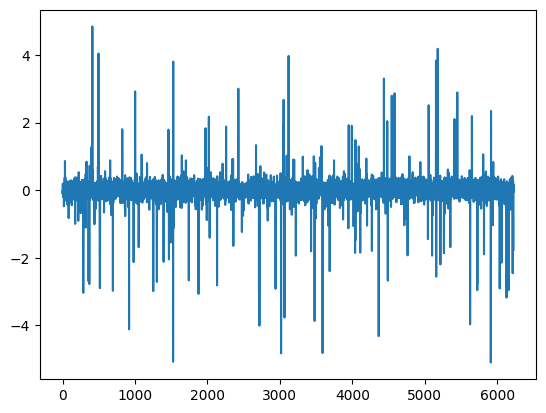

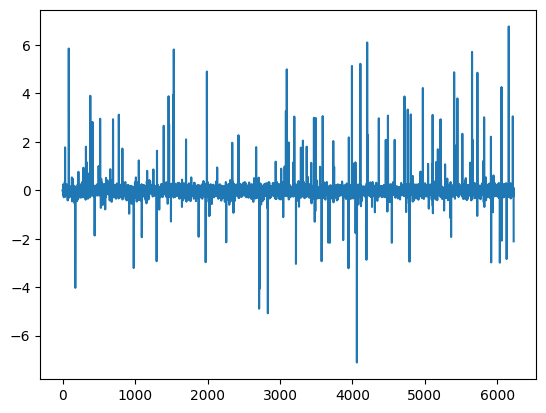

In [5]:
plt.plot(shift_pix[:,0])
plt.show()
plt.plot(shift_pix[:,1])
plt.show()

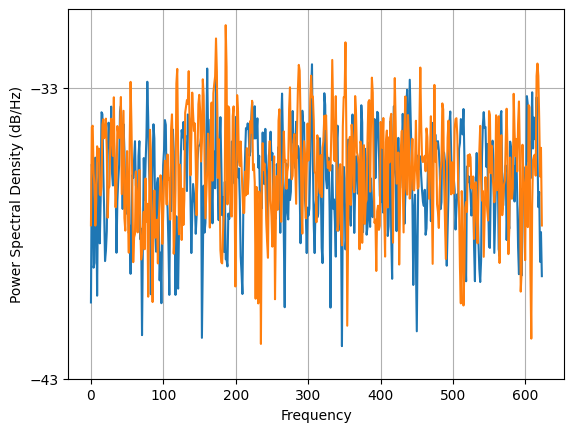

In [6]:
py, freq = plt.psd(shift_pix[:,0], Fs=fps, NFFT=1024)
px, freq = plt.psd(shift_pix[:,1], Fs=fps, NFFT=1024)

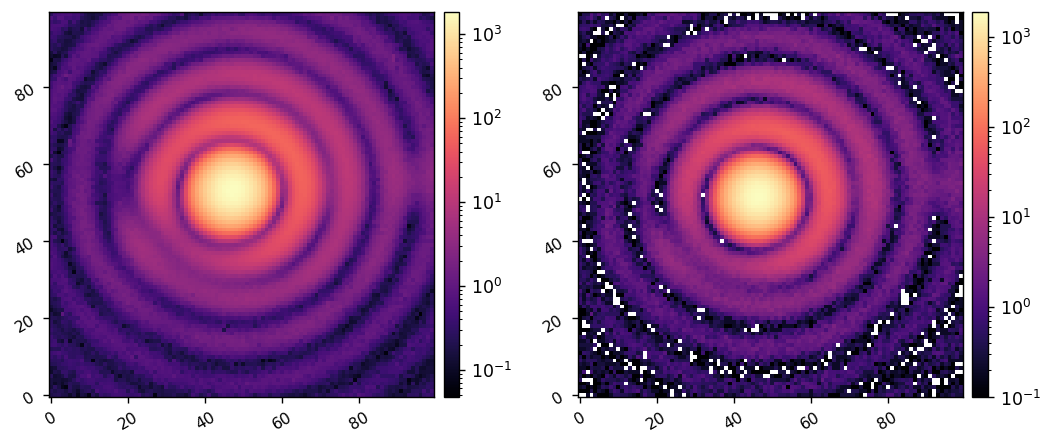

In [7]:
date = 20241021
long_data, long_hdr = utils.load_fits(f'data/drift/{date}_long_drift_data_fsm_on.fits', header=True)
long_data = np_array(long_data)

Nlong = long_hdr['NAXIS3']
fps = long_hdr['FREQ']
mean_frame = np.mean(long_data, axis=0)
imshow2(mean_frame, long_data[0], lognorm1=True, lognorm2=True)

In [8]:
shift_pix = []
for i in range(Nlong):
    shift, _, _ = phase_cross_correlation(long_data[i], mean_frame, upsample_factor=100)
    shift_pix.append(shift)
shift_pix = np.array(shift_pix)

In [9]:
shift_pix[:,0] = shift_pix[:,0] - np.mean(shift_pix[:,0])
shift_pix[:,1] = shift_pix[:,1] - np.mean(shift_pix[:,1])

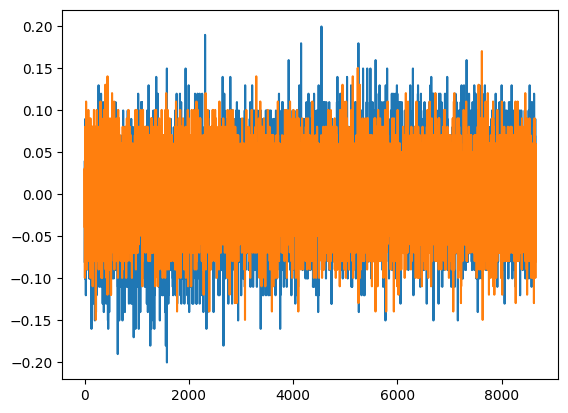

In [10]:
plt.plot(shift_pix[:,0])
plt.plot(shift_pix[:,1])
plt.show()

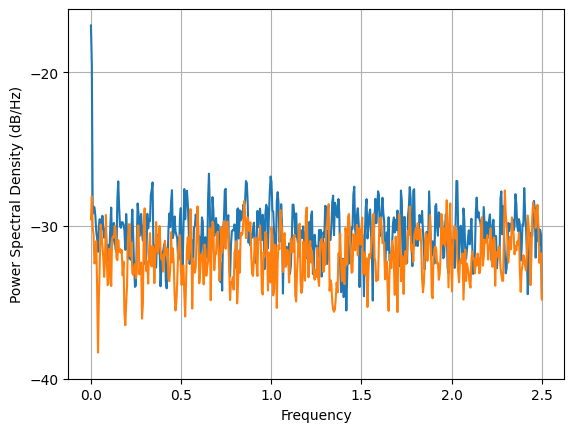

In [11]:
py, freq = plt.psd(shift_pix[:,0], Fs=fps, NFFT=1024)
px, freq = plt.psd(shift_pix[:,1], Fs=fps, NFFT=1024)